In [120]:
#토양검정정보의 ph 수치(float), 배수등급(str) 추출하기
#군위 21개, 포천 771개의 액셀 파일에서 전부 추출해야함

#1. 파일 불러오는 함수 생성: for문으로 파일들 입력받기
#2. 변수 추출하는 함수 생성: 모든 시트의 동일한 위치에 존재함
#3. 추출한 변수 한 개의 데이터프레임에 합치기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




In [121]:
#군위 먼저!!

#1. 파일 불러오기: for문으로 파일들 입력받기
#2. 변수 추출하기: 모든 시트의 동일한 위치에 존재함
#3. 추출한 변수 한 개의 데이터프레임에 합치기
#4. 지저분한 내용 제거해주기
#5. ph값 실수로 바꿔주기
import csv
import re
  
strSupply_water = []
strPh = [] 

for i in range(1, 22):
    path_folder = f'/Users/Star1/Desktop/부트캠프_파이썬 _실습/Python_Practice/프로젝트/군위,포천_토양raw데이터/토양데이터_군위/gunwi{i}.csv'

    
    with open(path_folder, 'r', encoding='utf-8') as file:
        reader = csv.reader(file, delimiter=' ')
        
        for j, row in enumerate(reader):
            if '\t\t\t\t<th>배수등급</th>' in row:
                next_row_supply = next(reader, None)
                nrs = next_row_supply[0] #re.sub 함수 사용 위해 리스트가 아닌 문자열 추출
                nrs = re.sub(r"""\t\t\t\t<td>""", '', nrs )
                nrs = re.sub(r"</td>", '', nrs)
                
                if not nrs: #빈칸 제거
                    pass
                else:
                    strSupply_water.append(nrs)
            # elif '\t\t\t\t<th>유효토심</th>' in row:
            #     next_row_depth = next(reader, None)
            #     print(next_row_depth)
            elif 'class="s_head">토양분석결과</th>' in row:
                next_row_ph = next(reader, None)
                nrp = next_row_ph[0]
                nrp = re.sub("\t\t\t\t<td>", "", nrp)
                nrp = re.sub("</td>", "", nrp)
                
                if not nrp:
                    pass
                else:
                    nrp = float(nrp)
                    strPh.append(nrp)

print(strSupply_water)
print(strPh)

#결론: strSupply_water랑 strPh 각각에 배수등급과 ph값이 담기게 되었음.


FileNotFoundError: [Errno 2] No such file or directory: '/Users/Star1/Desktop/부트캠프_파이썬 _실습/Python_Practice/프로젝트/군위,포천_토양raw데이터/토양데이터_군위/gunwi1.csv'

배수등급- 최빈값: 2/ 중앙값: 2/ 평균: 2/ 표준편차: 1.4548768561863463
ph값- 최빈값: 6.6/ 중앙값: 7.1/ 평균: 6.519/ 표준편차: 0.7148134954890913
    배수등급  ph농도
0      2   7.7
1      1   6.6
2      3   5.4
3      1   7.6
4     -2   6.6
5      2   7.0
6      2   6.5
7      2   6.2
8      1   7.1
9      3   5.4
10     2   6.0
11     2   6.1
12     2   5.6
13     2   6.9
14    -2   7.2
15     1   6.4


/Users/Star1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


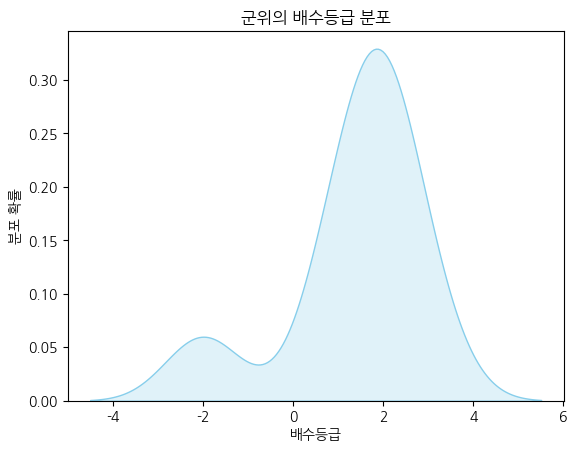

/Users/Star1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


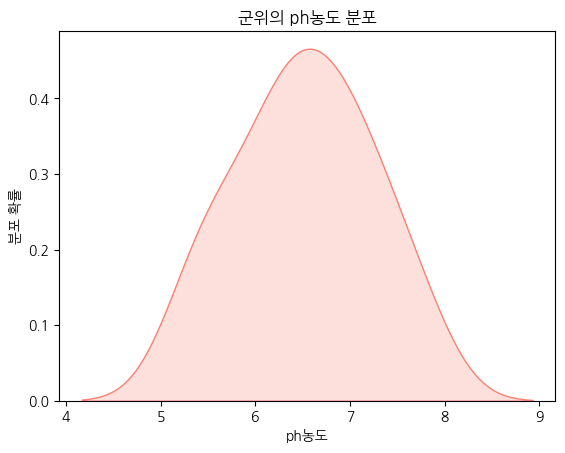

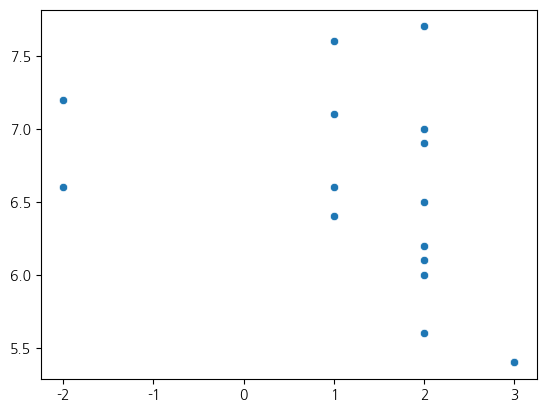

In [ ]:
import statistics
#1.문자열인 배수등급을 숫자로 바꿔주기
#2.배수등급 최빈값, 중앙값, 전체 평균 도출

dSupply_water = {'매우양호':3, '약간양호':2, '양호':1, '보통':0, '불량':-1 ,'약간불량':-2, '매우불량':-3}
# dictDepth = {'깊음':1, '보통':0, '얕음':-1, '매우얕음':-2}

# for i in range(len(strSupply_water)-1):
#     if strSupply_water[i] in dSupply_water:
#         print(dSupply_water[])

nAvg_water = 0
nSupply_water = []
for elem in strSupply_water:
    if elem in dSupply_water.keys():
        nAvg_water += dSupply_water[elem]
        nSupply_water.append(dSupply_water[elem])

nSupply_water_sort = sorted(nSupply_water)

nMode_water = statistics.mode(nSupply_water_sort) # 배수등급 최빈값

nMedian_water = nSupply_water_sort[len(nSupply_water)//2] #배수등급 중앙값

nAvg_water /= len(strSupply_water) 
nMean_water = round(nAvg_water, 3)#배수등급 평균
nStd = statistics.stdev(nSupply_water)#배수등급 표준편차


print(f"배수등급- 최빈값: {nMode_water}/ 중앙값: {nMedian_water}/ 평균: {nMedian_water}/ 표준편차: {nStd}")

#3. ph값 최빈값, 중앙값, 전체 평균 도출
nPh = strPh

nMode_ph = statistics.mode(nPh) # 배수등급 최빈값
nMedian_ph = nPh[len(nPh)//2] #배수등급 중앙값

nMean_ph = 0
for elem in nPh:
    nMean_ph += elem
nMean_ph /= len(nPh)
nMean_ph = round(nMean_ph, 3) #배수등급 평균
nStd_ph = statistics.stdev(nPh)

print(f"ph값- 최빈값: {nMode_ph}/ 중앙값: {nMedian_ph}/ 평균: {nMean_ph}/ 표준편차: {nStd_ph}")


#4. 배수등급과 ph값을 각각의 컬럼으로 바꾸어 하나의 데이터프레임 만들기

df=[]
df_gunwi = pd.DataFrame(df)
df_gunwi['배수등급'] = nSupply_water
df_gunwi['ph농도'] = nPh
print(df_gunwi)

#우연의 일치로 군위는 두 리스트의 인덱스 개수가 같아서 아래와 같은 판다스 작업을 안해줘도 된다.

# nMax_water_ph = max(len(nPh), len(nSupply_water))

# # pd.Series로 데이터프레임의 각 열을 생성
# ph_series = pd.Series(nPh, name='ph농도')
# supply_water_series = pd.Series(nSupply_water, name='배수등급')

# # 데이터프레임 생성
# df_pocheon = pd.DataFrame({'ph농도': ph_series, '배수등급': supply_water_series})
# #df_pocheon = df_pocheon.fillna() #결측치를 바꾸는 함수


#5.통계분석 및 시각화

sns.kdeplot(nSupply_water, color='skyblue', fill=True) #배수등급 자체가 실수가 아닌 정수로 치환했으므로, 연속확률분포 그래프보다는 막대선 빈도그래프가 더 낫긴한데, 통잀성을 위해.
plt.title('군위의 배수등급 분포')
plt.xlabel('배수등급')
plt.ylabel('분포 확률')
plt.show()


sns.kdeplot(nPh, color='salmon', fill=True)
plt.title('군위의 ph농도 분포')
plt.xlabel('ph농도')
plt.ylabel('분포 확률')
plt.show()

# plt.hist(nSupply_water, bins=30, color='blue', alpha=0.7)
# plt.title('Histogram of 1D Array')
# plt.xlabel('Values')
# plt.ylabel('Frequency')
# plt.show()

plt.rcParams['axes.unicode_minus'] = False


In [ ]:
# plt.hist(nPh, bins=30, color='blue', alpha=0.7)
# plt.title('Histogram of 1D Array')
# plt.xlabel('Values')
# plt.ylabel('Frequency')
# plt.show()



In [ ]:
#군위 파일 내보내기
df_gunwi.to_csv('./df_gunwi_preproceseed.csv', index=False)


In [ ]:
#포천. 군위처럼 그대로 해주기

#1. 파일 불러오기: for문으로 파일들 입력받기
#2. 변수 추출하기: 모든 시트의 동일한 위치에 존재함
#3. 추출한 변수 한 개의 데이터프레임에 합치기
#4. 지저분한 내용 제거해주기
#5. ph값 실수로 바꿔주기
import csv
import re
  
strSupply_water = []
strPh = [] 

for i in range(2, 772):
    path_folder = f'/Users/Star1/Desktop/부트캠프_파이썬 _실습/Python_Practice/프로젝트/군위,포천_토양raw데이터/토양데이터_포천/pocheon{i}.csv'

    with open(path_folder, 'r', encoding='utf-8') as file:
        reader = csv.reader(file, delimiter=' ')
        for j, row in enumerate(reader):
            if '\t\t\t\t<th>배수등급</th>' in row:
                next_row_supply = next(reader, None)
                nrs = next_row_supply[0] #re.sub 함수 사용 위해 리스트가 아닌 문자열 추출
                nrs = re.sub(r"""\t\t\t\t<td>""", '', nrs )
                nrs = re.sub(r"</td>", '', nrs)
                
                if not nrs: #빈칸 제거
                    pass
                else:
                    strSupply_water.append(nrs)
            # elif '\t\t\t\t<th>유효토심</th>' in row:
            #     next_row_depth = next(reader, None)
            #     print(next_row_depth)
            elif 'class="s_head">토양분석결과</th>' in row:
                next_row_ph = next(reader, None)
                nrp = next_row_ph[0]
                nrp = re.sub("\t\t\t\t<td>", "", nrp)
                nrp = re.sub("</td>", "", nrp)
                
                if not nrp:
                    pass
                else:
                    nrp = float(nrp)
                    strPh.append(nrp)

print(strSupply_water)
print(strPh)

#결론: strSupply_water랑 strPh 각각에 배수등급과 ph값이 담기게 되었음.



['약간양호', '약간양호', '약간양호', '양호', '양호', '양호', '양호', '양호', '양호', '약간불량', '매우양호', '매우양호', '양호', '양호', '매우양호', '양호', '매우양호', '양호', '양호', '양호', '양호', '매우양호', '매우불량', '매우불량', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '양호', '양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '양호', '양호', '약간양호', '매우양호', '매우불량', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '양호', '양호', '약간양호', '양호', '약간불량', '약간불량', '약간불량', '약간불량', '양호', '양호', '약간불량', '양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '양호', '양호', '매우양호', '약간양호', '약간양호', '양호', '약간양호', '약간양호', '약간양호', '양호', '양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간양호', '약간불량', '양호', '약간양호', '약간양호', '약간양호', '약간

배수등급- 최빈값: 1/ 중앙값: 1/ 평균: 1/ 표준편차: 1.47240134127005
ph값- 최빈값: 6.6/ 중앙값: 5.2/ 평균: 6.413/ 표준편차: 0.8691087433939934
     ph농도  배수등급
0     5.9     2
1     4.8     2
2     5.9     2
3     7.3     1
4     6.8     1
..    ...   ...
591   NaN     1
592   NaN    -2
593   NaN    -2
594   NaN     1
595   NaN     1

[596 rows x 2 columns]


/Users/Star1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


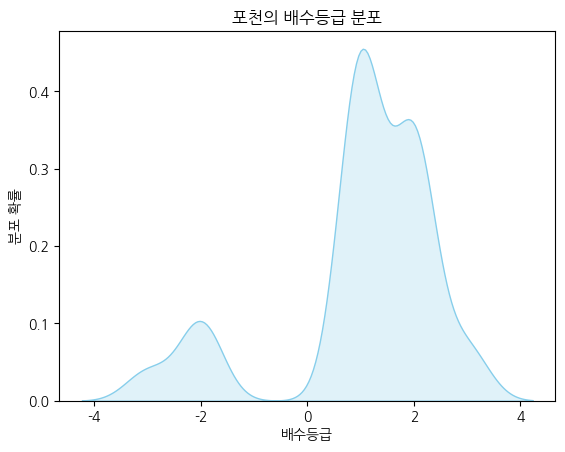

/Users/Star1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


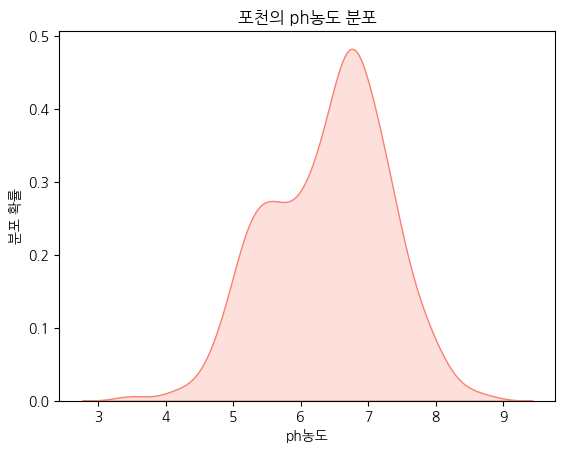

<Axes: >

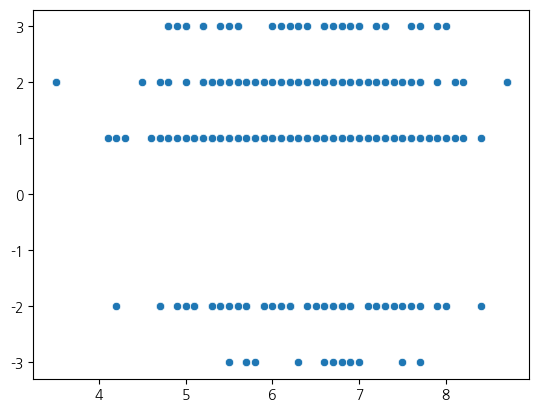

In [ ]:
import statistics
#1.문자열인 배수등급을 숫자로 바꿔주기
#2.배수등급 최빈값, 중앙값, 전체 평균 도출

dSupply_water = {'매우양호':3, '약간양호':2, '양호':1, '보통':0, '불량':-1 ,'약간불량':-2, '매우불량':-3}
# dictDepth = {'깊음':1, '보통':0, '얕음':-1, '매우얕음':-2}

# for i in range(len(strSupply_water)-1):
#     if strSupply_water[i] in dSupply_water:
#         print(dSupply_water[])

nAvg_water = 0
nSupply_water = [] #배수등급 담을 리스트
for elem in strSupply_water:
    if elem in dSupply_water.keys():
        nAvg_water += dSupply_water[elem]
        nSupply_water.append(dSupply_water[elem])

nSupply_water_sort = sorted(nSupply_water)

nMode_water = statistics.mode(nSupply_water_sort) # 배수등급 최빈값

nMedian_water = nSupply_water_sort[len(nSupply_water)//2] #배수등급 중앙값

nAvg_water /= len(strSupply_water) 
nMean_water = round(nAvg_water, 3)#배수등급 평균
nStd_water = statistics.stdev(nSupply_water)
print(f"배수등급- 최빈값: {nMode_water}/ 중앙값: {nMedian_water}/ 평균: {nMedian_water}/ 표준편차: {nStd_water}")


#3. ph값 최빈값, 중앙값, 전체 평균 도출
nPh = strPh # ph농도 담을 리스트

nMode_ph = statistics.mode(nPh) # ph 최빈값
nMedian_ph = nPh[len(nPh)//2] #ph 중앙값

nMean_ph = 0
for elem in nPh:
    nMean_ph += elem
nMean_ph /= len(nPh)
nMean_ph = round(nMean_ph, 3) #ph 평균
nStd_ph = statistics.stdev(nPh)
print(f"ph값- 최빈값: {nMode_ph}/ 중앙값: {nMedian_ph}/ 평균: {nMean_ph}/ 표준편차: {nStd_ph}")


#4. 배수등급과 ph값을 각각의 컬럼으로 바꾸어 하나의 데이터프레임 만들기

nMax_water_ph = max(len(nPh), len(nSupply_water))

# pd.Series로 데이터프레임의 각 열을 생성
ph_series = pd.Series(nPh, name='ph농도')
supply_water_series = pd.Series(nSupply_water, name='배수등급')

# 데이터프레임 생성
df_pocheon = pd.DataFrame({'ph농도': ph_series, '배수등급': supply_water_series})
#df_pocheon = df_pocheon.fillna() #결측치를 바꾸는 함수

print(df_pocheon)


#5.통계분석 및 시각화

sns.kdeplot(nSupply_water, color='skyblue', fill=True) #배수등급 자체가 실수가 아닌 정수로 치환했으므로, 연속확률분포 그래프보다는 막대선 빈도그래프가 더 낫긴한데, 통잀성을 위해.
plt.title('포천의 배수등급 분포')
plt.xlabel('배수등급')
plt.ylabel('분포 확률')
plt.show()


sns.kdeplot(nPh, color='salmon', fill=True)
plt.title('포천의 ph농도 분포')
plt.xlabel('ph농도')
plt.ylabel('분포 확률')
plt.show()


sns.scatterplot(x=nPh, y = nSupply_water[:542])
# df = pd.DataFrame(index=range(1001), columns=['ph농도', '배수등급'])
# df_pocheon = df.fillna(0) # 모든 데이터를 0으로 초기화

# # nMax_water_ph = max(len(nPh), len(nSupply_water))

# # df=pd.DataFrame({'ph농도': nPh, '배수등급': nSupply_water}, index = range(nMax_water_ph))


# # df_pocheon = pd.DataFrame({'ph농도':nPh, '배수등급': nSupply_water}, index=range(max(len(nPh), len(nSupply_water))))
# df_pocheon['배수등급'] = nSupply_water
# df_pocheon['ph농도'] = nPh


In [ ]:
#포천 파일 내보내기
df_pocheon.to_csv('./df_pocheon_preproceseed.csv', index=False)


아래는 군위와 포천의 맛데이터 및 토양데이터의 상관계수 분석과 시각화(히트맵, 그래프)

In [ ]:
import matplotlib.font_manager as fm  # 폰트 매니저 실행


fe = fm.FontEntry(fname=r'/Users/Star1/Desktop/부트캠프_파이썬 _실습/Python_Practice/프로젝트/글꼴/나눔글꼴/나눔명조/NanumFontSetup_OTF_MYUNGJO/NanumMyeongjoBold.otf', name='NanumMyengjoBold') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

In [131]:
path_folder = f'/Users/Star1/Desktop/부트캠프_파이썬 _실습/Python_Practice/프로젝트/전처리/used_apple.csv'
df_app = pd.read_csv(path_folder)

#군위 맛데이터
df_app_gunwi = df_app.iloc[:7]
# type(df_app_gunwi['평균 : 경도평균'])
df_app_gunwi

,평균 : 경도평균,평균 : 당도,평균 : 산도(%)
0,38.0,15.2,0.19
1,37.7,15.6,0.23
2,60.1,14.0,0.23
3,58.0,14.5,0.23
4,56.0,13.4,0.22
5,54.7,13.9,0.27
6,62.4,14.8,0.22


In [136]:
class Stat(list):
    def mean(list):
        return statistics.mode(list)
    def median(list):
        return statistics.median(list)
    def std(list):
        return statistics.stdev(list)
    def mode(list):
        return  statistics.mode(list)


gunwi_hard = df_app_gunwi['평균 : 경도평균']
gunwi_sugar = df_app_gunwi['평균 : 당도']
gunwi_acid = df_app_gunwi['평균 : 산도(%)']


print(f"경도 기본 통계:: 중앙값: {Stat.median(gunwi_hard)}/ 평균: {Stat.mean(gunwi_hard)}/ 표준편차: {Stat.std(gunwi_hard)}/ 최빈값: {Stat.mode(gunwi_hard)}")
print(f"당도 기본 통계:: 중앙값: {Stat.median(gunwi_sugar)}/ 평균: {Stat.mean(gunwi_sugar)}/ 표준편차: {Stat.std(gunwi_sugar)}/ 최빈값: {Stat.mode(gunwi_sugar)}")
print(f"산도 기본 통계:: 중앙값: {Stat.median(gunwi_acid)}/ 평균: {Stat.mean(gunwi_acid)}/ 표준편차: {Stat.std(gunwi_acid)}/ 최빈값: {Stat.mode(gunwi_acid)}")



경도 기본 통계:: 중앙값: 56.0/ 평균: 38.0/ 표준편차: 10.266032757176871/ 최빈값: 38.0
당도 기본 통계:: 중앙값: 14.5/ 평균: 15.2/ 표준편차: 0.775518259893712/ 최빈값: 15.2
산도 기본 통계:: 중앙값: 0.23/ 평균: 0.23/ 표준편차: 0.0236038737740833/ 최빈값: 0.23


/Users/Star1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


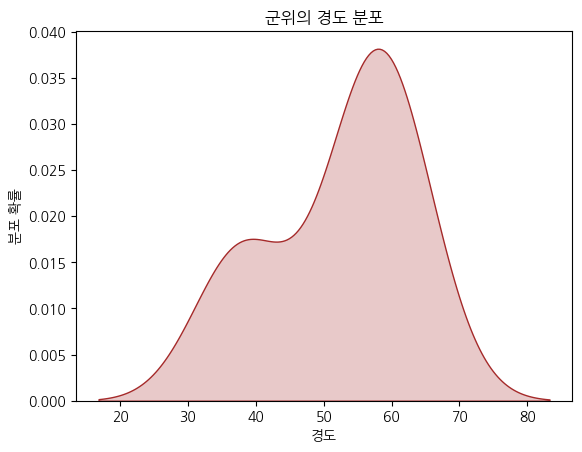

/Users/Star1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


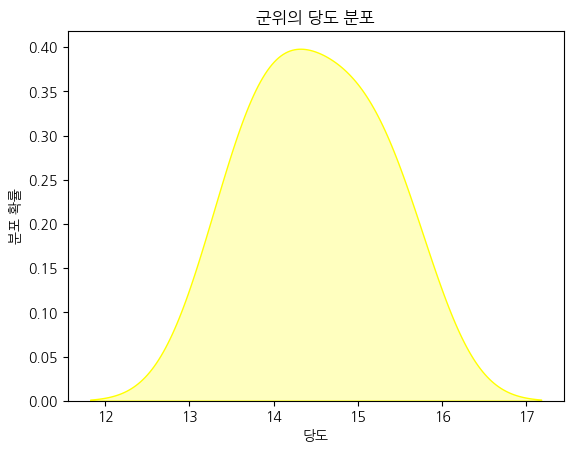

/Users/Star1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


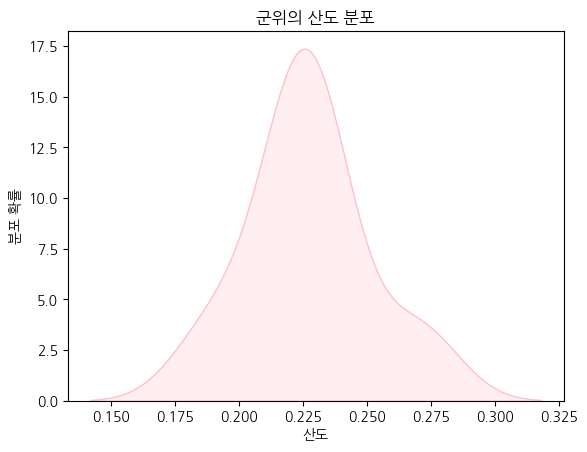

In [140]:
sns.kdeplot(gunwi_hard, color='brown', fill=True) 
plt.title('군위의 경도 분포')
plt.xlabel('경도')
plt.ylabel('분포 확률')
plt.show()

sns.kdeplot(gunwi_sugar, color='yellow', fill=True) 
plt.title('군위의 당도 분포')
plt.xlabel('당도')
plt.ylabel('분포 확률')
plt.show()

sns.kdeplot(gunwi_acid, color='pink', fill=True) 
plt.title('군위의 산도 분포')
plt.xlabel('산도')
plt.ylabel('분포 확률')
plt.show()

In [137]:
#포천 맛데이터
df_app_pocheon = df_app.iloc[7:]
df_app_pocheon= df_app_pocheon.reset_index(drop=True)
df_app_pocheon


,평균 : 경도평균,평균 : 당도,평균 : 산도(%)
0,37.6,13.2,0.21
1,36.2,13.3,0.22
2,40.9,13.0,0.32
3,39.7,15.0,0.25
4,37.7,14.0,0.21
5,39.8,14.1,0.21
6,65.3,14.5,0.19


In [138]:
class Stat(list):
    def mean(list):
        return statistics.mode(list)
    def median(list):
        return statistics.median(list)
    def std(list):
        return statistics.stdev(list)
    def mode(list):
        return  statistics.mode(list)


pocheon_hard = df_app_pocheon['평균 : 경도평균']
pocheon_sugar = df_app_pocheon['평균 : 당도']
pocheon_acid = df_app_pocheon['평균 : 산도(%)']


print(f"경도 기본 통계:: 중앙값: {Stat.median(pocheon_hard)}/ 평균: {Stat.mean(pocheon_hard)}/ 표준편차: {Stat.std(pocheon_hard)}/ 최빈값: {Stat.mode(pocheon_hard)}")
print(f"당도 기본 통계:: 중앙값: {Stat.median(pocheon_sugar)}/ 평균: {Stat.mean(pocheon_sugar)}/ 표준편차: {Stat.std(pocheon_sugar)}/ 최빈값: {Stat.mode(pocheon_sugar)}")
print(f"산도 기본 통계:: 중앙값: {Stat.median(pocheon_acid)}/ 평균: {Stat.mean(pocheon_acid)}/ 표준편차: {Stat.std(pocheon_acid)}/ 최빈값: {Stat.mode(pocheon_acid)}")


경도 기본 통계:: 중앙값: 39.7/ 평균: 37.6/ 표준편차: 10.200140055060867/ 최빈값: 37.6
당도 기본 통계:: 중앙값: 14.0/ 평균: 13.2/ 표준편차: 0.7387247699341655/ 최빈값: 13.2
산도 기본 통계:: 중앙값: 0.21/ 평균: 0.21/ 표준편차: 0.04358898943540674/ 최빈값: 0.21


/Users/Star1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


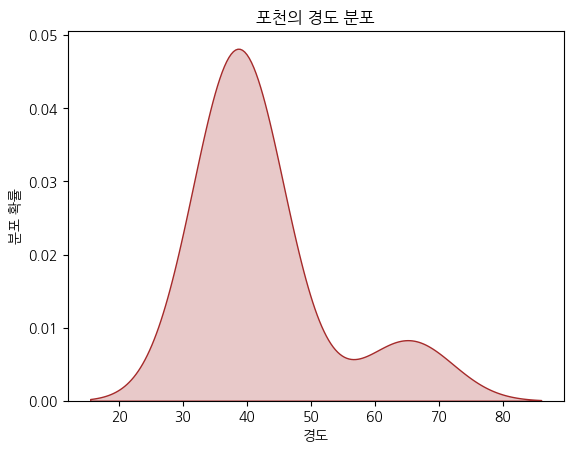

/Users/Star1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


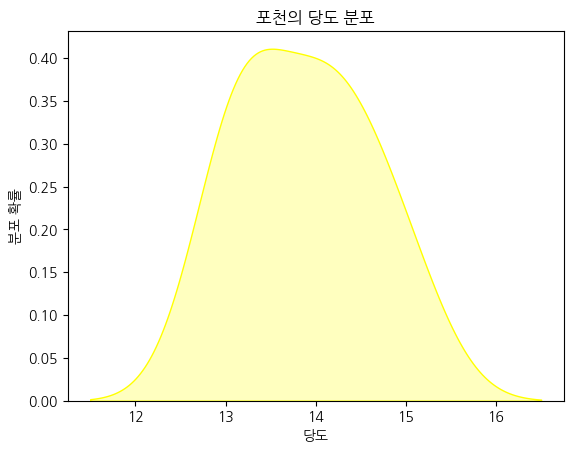

/Users/Star1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


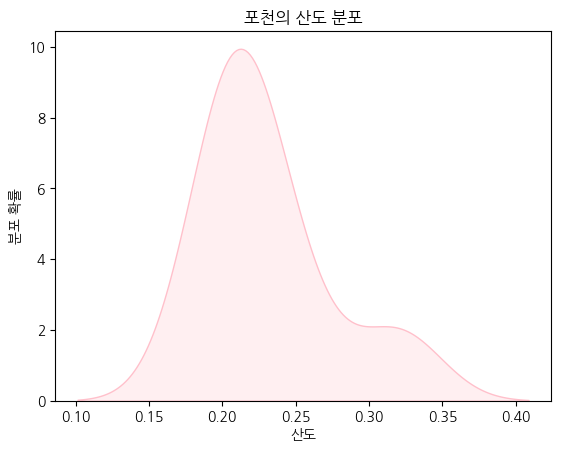

In [141]:
sns.kdeplot(pocheon_hard, color='brown', fill=True) 
plt.title('포천의 경도 분포')
plt.xlabel('경도')
plt.ylabel('분포 확률')
plt.show()

sns.kdeplot(pocheon_sugar, color='yellow', fill=True) 
plt.title('포천의 당도 분포')
plt.xlabel('당도')
plt.ylabel('분포 확률')
plt.show()

sns.kdeplot(pocheon_acid, color='pink', fill=True) 
plt.title('포천의 산도 분포')
plt.xlabel('산도')
plt.ylabel('분포 확률')
plt.show()

In [168]:
#포천 맛데이터+토양데이터
pocheon= pd.concat([df_pocheon, df_app_pocheon], axis=1)

pocheon.to_excel('./pocheon_Nan.xlsx', index=False)
pocheon
# pocheon.isnull().sum()#각 열의 결측치 확인

# random_hardness = (np.random.uniform(35, 42, 595-54+1)) #전체 인덱스 595에서 ph 결측치 개수 54 제외
# random_hardness = pd.Series(random_hardness)

# pocheon = pd.concat([pocheon, random_hardness], axis=1)


,ph농도,배수등급,평균 : 경도평균,평균 : 당도,평균 : 산도(%)
0,5.9,2,37.6,13.2,0.21
1,4.8,2,36.2,13.3,0.22
2,5.9,2,40.9,13.0,0.32
3,7.3,1,39.7,15.0,0.25
4,6.8,1,37.7,14.0,0.21
...,...,...,...,...,...
591,NaN,1,NaN,NaN,NaN
592,NaN,-2,NaN,NaN,NaN
593,NaN,-2,NaN,NaN,NaN
594,NaN,1,NaN,NaN,NaN


In [170]:
pocheon_hitmap = pd.read_excel('./pocheon_Nan_new.xlsx')
pocheon_hitmap


,ph농도,배수등급,평균 : 경도평균,평균 : 당도,평균 : 산도(%)
0,5.9,2,37.6,13.2,0.21
1,4.8,2,36.2,13.3,0.22
2,5.9,2,40.9,13.0,0.32
3,7.3,1,39.7,15.0,0.25
4,6.8,1,37.7,14.0,0.21
...,...,...,...,...,...
591,6.9,1,39.7,15.0,0.25
592,5.2,-2,37.7,14.0,0.21
593,8.1,-2,39.8,14.1,0.21
594,7.7,1,65.3,14.5,0.19


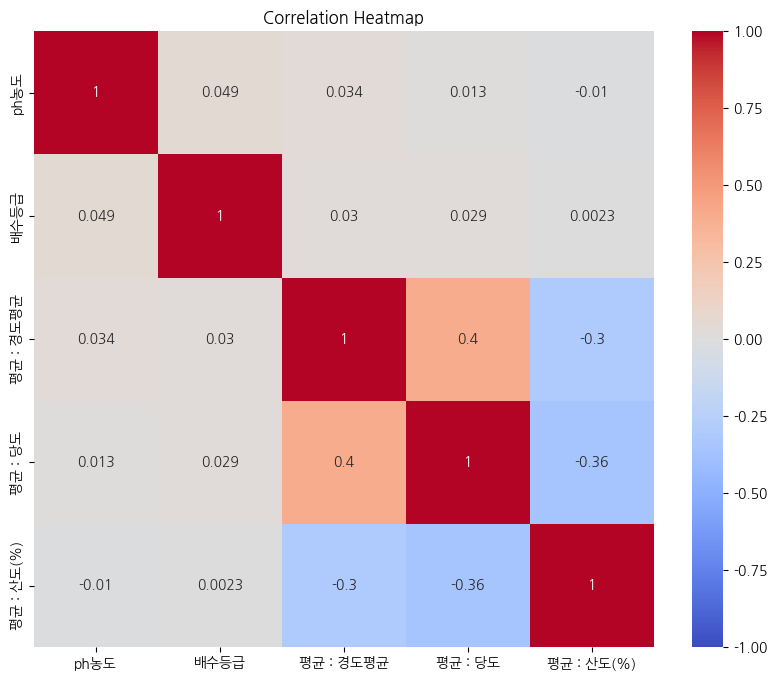

In [171]:
#결측치 다 채운 히트맵 시각화
cor_matrix_pocheon = pocheon_hitmap.corr() #상관관계 히트맵.
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix_pocheon, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


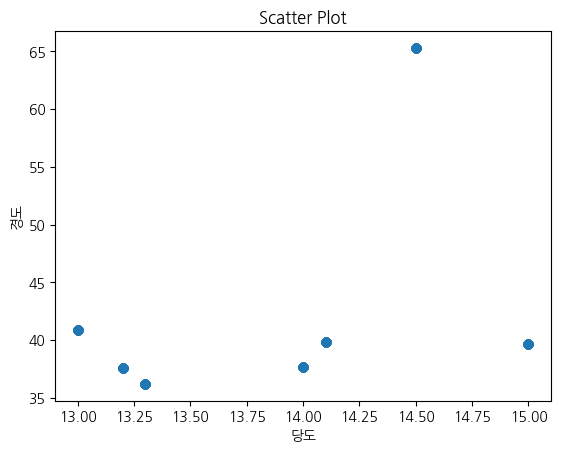

In [174]:
#결측치 다 채운 산점도 시각화
plt.scatter(pocheon_hitmap['평균 : 당도'], pocheon_hitmap['평균 : 경도평균'])

# 그래프에 제목과 레이블 추가
plt.title('Scatter Plot')
plt.xlabel('당도')
plt.ylabel('경도')

# 그래프 표시
plt.show()
#결론은 계속 복붙한거라 점이 저게 전부가 맞음

In [154]:
from sklearn.impute import SimpleImputer

#군위 맛데이터+토양 데이터
gunwi = pd.concat([df_gunwi, df_app_gunwi], axis = 1)
gunwi
gunwi.to_excel('./gunwi_Nan.xlsx', index=False)

# hardness_gunwi = gunwi[['평균 : 경도평균']]

# # imputer = SimpleImputer(strategy='mean')
# # hardness_gunwi = imputer.fit_transform(hardness_gunwi)
# hardness_gunwi

# df = pd.DataFrame(data)
# # 독립변수와 종속변수 분리
# X = df[['ph농도', '배수등급']]
# y = df['평균 : 당도']


In [155]:
gunwi_hitmap = pd.read_excel('./gunwi_Nan.xlsx')
gunwi_hitmap

,배수등급,ph농도,평균 : 경도평균,평균 : 당도,평균 : 산도(%)
0,2,7.7,38.0,15.2,0.19
1,1,6.6,37.7,15.6,0.23
2,3,5.4,60.1,14.0,0.23
3,1,7.6,58.0,14.5,0.23
4,-2,6.6,56.0,13.4,0.22
5,2,7.0,54.7,13.9,0.27
6,2,6.5,62.4,14.8,0.22
7,2,6.2,38.0,15.2,0.19
8,1,7.1,37.7,15.6,0.23
9,3,5.4,60.1,14.0,0.23


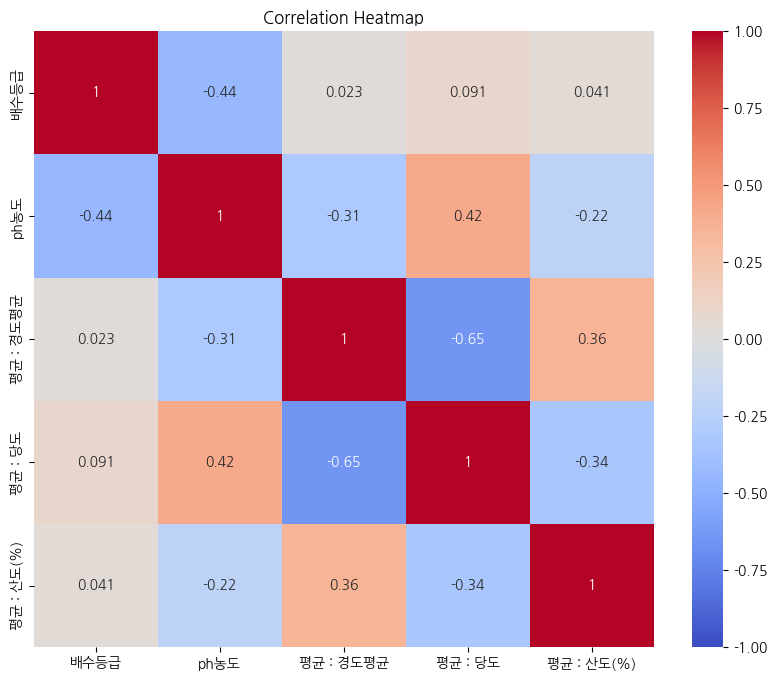

In [165]:
cor_matrix_gunwi = gunwi_hitmap.corr() #상관관계 히트맵.
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix_gunwi, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

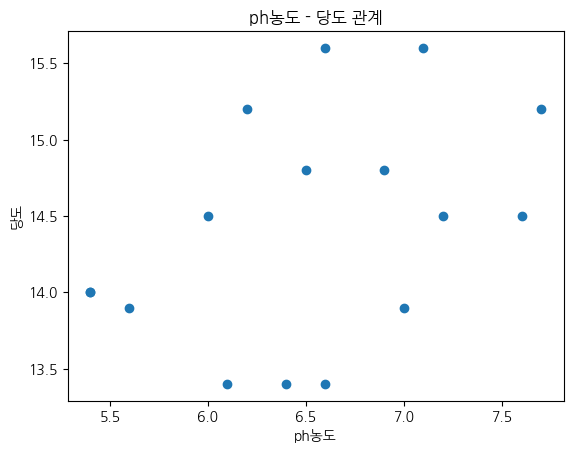

In [177]:
plt.scatter(gunwi_hitmap['ph농도'], gunwi_hitmap['평균 : 당도'])
plt.xlabel('ph농도')
plt.ylabel('당도')
plt.title('ph농도 - 당도 관계')

plt.show()

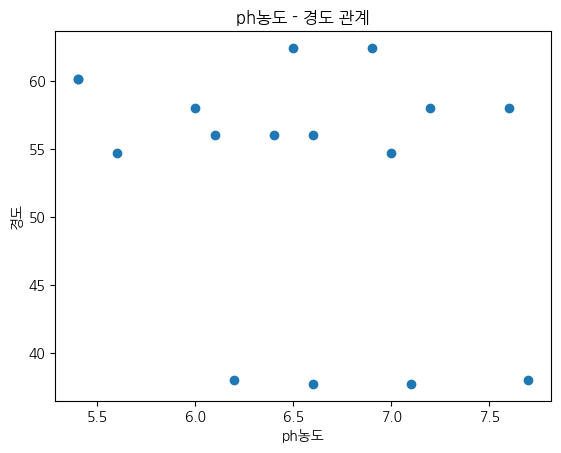

In [178]:
plt.scatter(gunwi_hitmap['ph농도'], gunwi_hitmap['평균 : 경도평균'])
plt.xlabel('ph농도')
plt.ylabel('경도')
plt.title('ph농도 - 경도 관계')

plt.show()

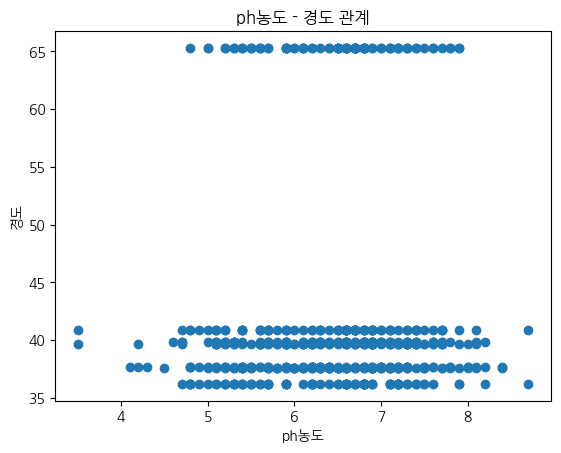

In [179]:
plt.scatter(pocheon_hitmap['ph농도'], pocheon_hitmap['평균 : 경도평균'])
plt.xlabel('ph농도')
plt.ylabel('경도')
plt.title('ph농도 - 경도 관계')

plt.show()

군위의 배수등급과 ph농도
-배수등급과 경도, 산도 간의 상관관계는 유의미한 결과가 없음
-배수등급과 당도 간 낮은 수준(+0.37)의 상관관계 존재

-ph농도와 경도 간 유의미한 수준(-0.41) 상관관계 존재
-ph농도와 당도, 산도는 낮은 수준의 상관관계(0.31,-0.21) 존재

*다만, 군위 자체의 배수등급과 ph농도의 데이터 개수가 적어서 전체적인 유의미성에는 의문점이 있음

In [164]:
# #포천 히트맵
# cor_matrix_gunwi = pocheon.corr() #상관관계 히트맵.
# plt.figure(figsize=(10, 8))
# sns.heatmap(cor_matrix_gunwi, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Heatmap')
# plt.show()

포천의 배수등급과 ph농도
-배수등급과 경도, 산도 간의 낮은 수준의 상관관계(-0.39, 0.43)
-배수등급과 당도 간 높은 수준(-0.89)의 상관관계 존재?

-ph농도와 경도 간 낮은 수준(0.42) 상관관계 존재
-ph농도와 당도는 높은 수준의 상관관계(0.79) 존재

*경도, 당도, 산도의 데이터 개수가 6개밖에 안되는게 문제인듯하다.?

/Users/Star1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Star1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Star1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Star1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

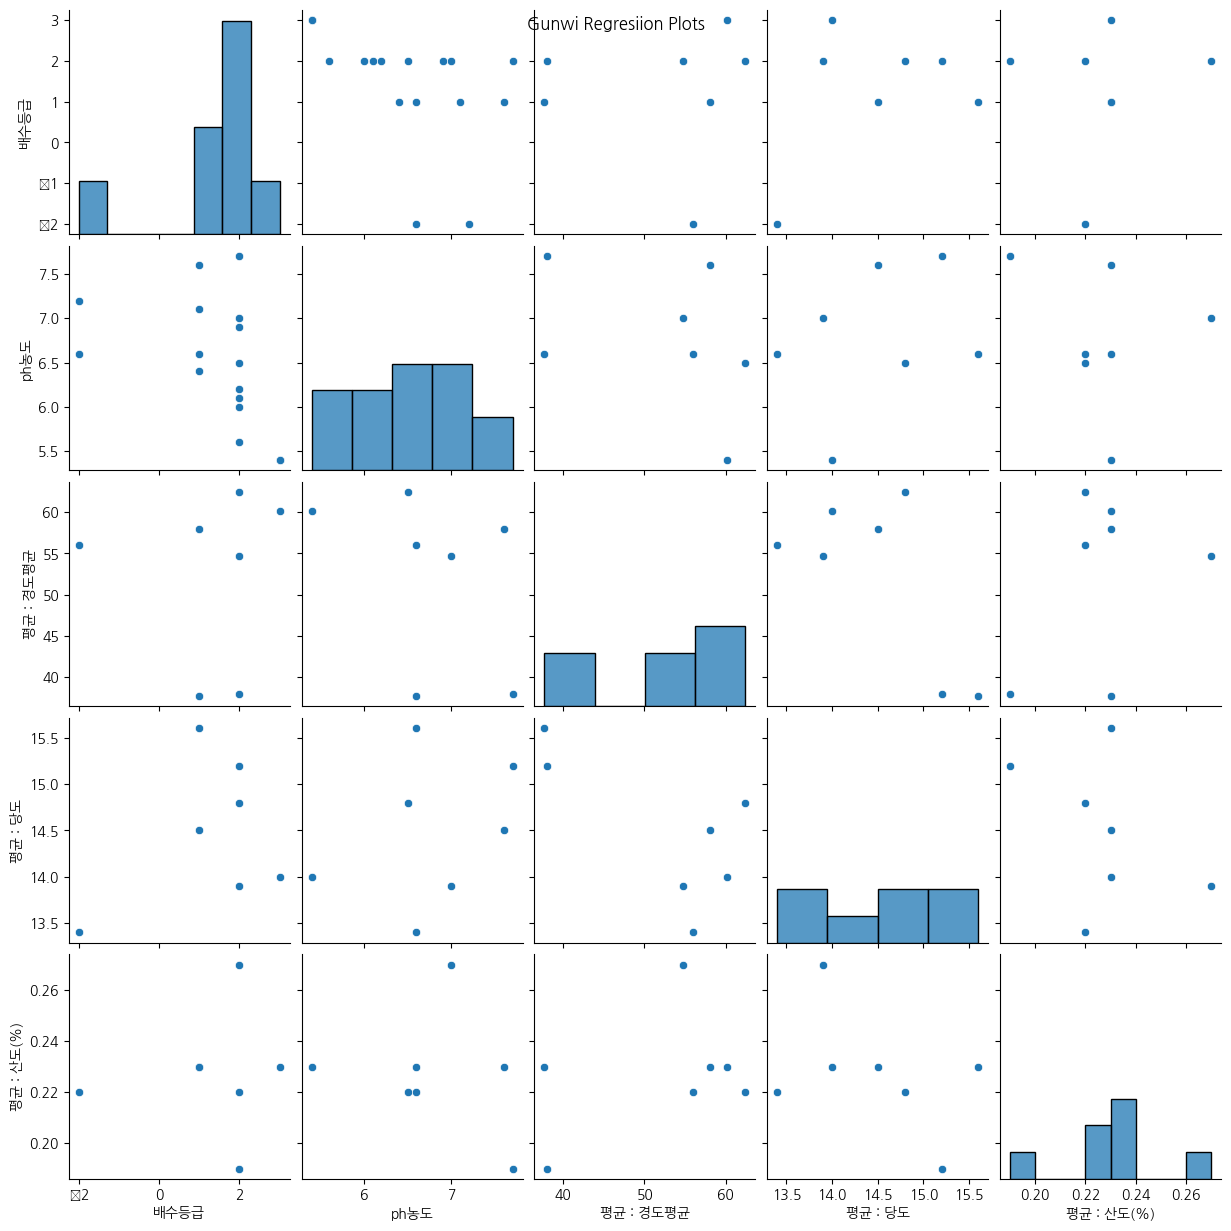

In [29]:
#군위 회귀 그래프
sns.pairplot(gunwi)
plt.suptitle('Gunwi Regresiion Plots')
plt.show()

/Users/Star1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Star1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Star1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Star1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

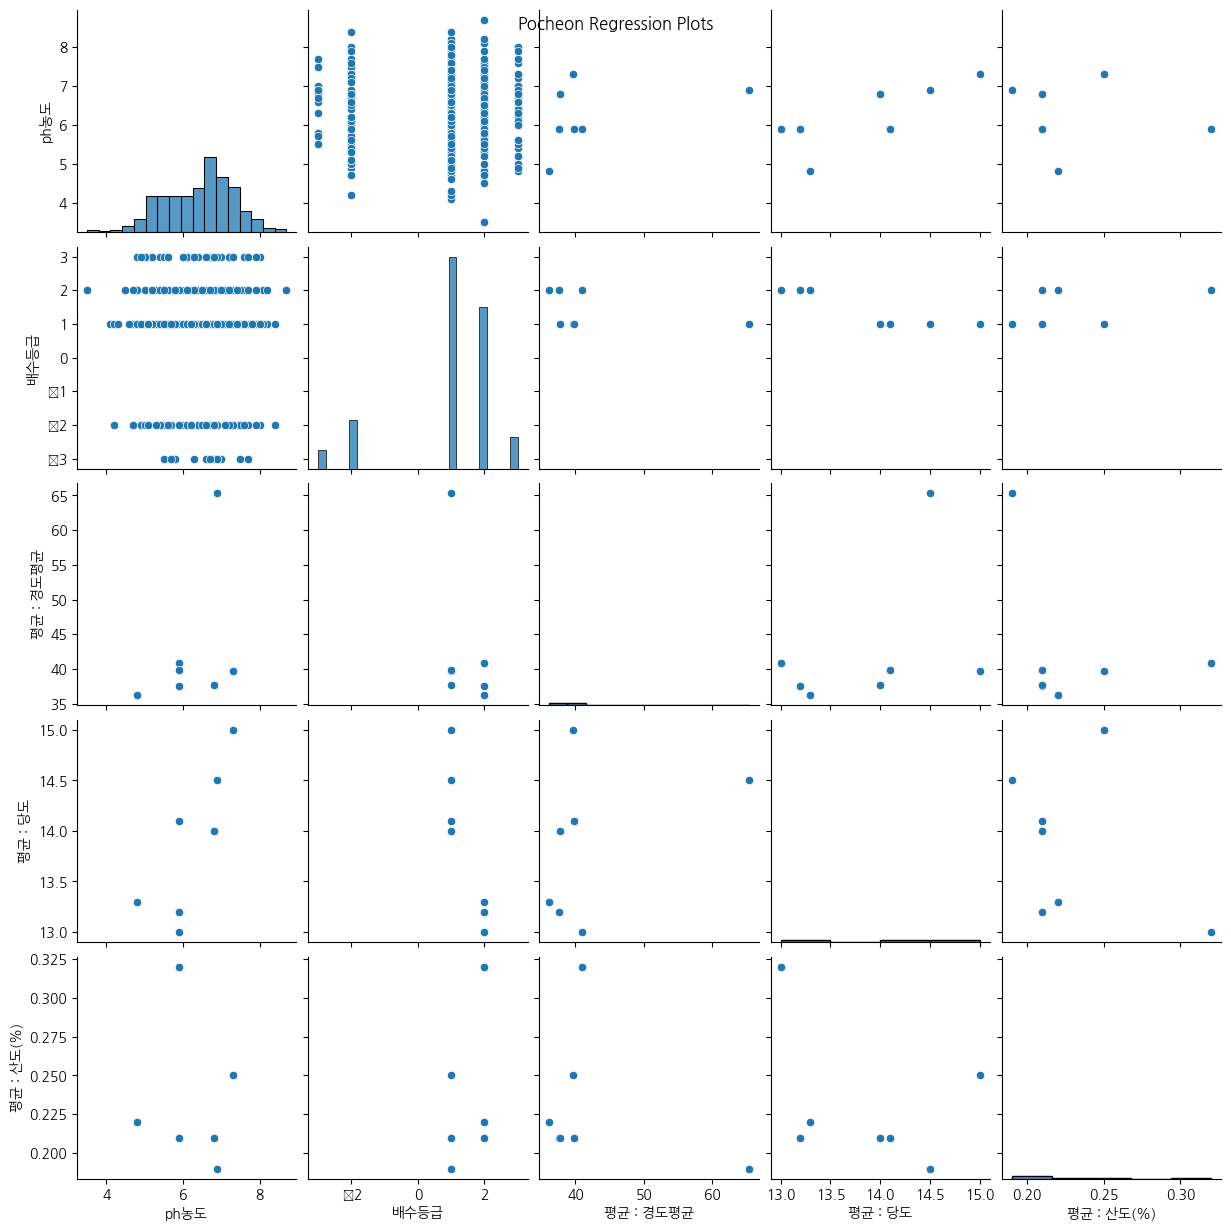

In [30]:
#포천 회귀 그래프
sns.pairplot(pocheon)
plt.suptitle('Pocheon Regression Plots')
plt.show()


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# 예제 데이터 생성
data = pocheon
df = pd.DataFrame(data)

# 독립변수와 종속변수 분리
X = df[['ph농도', '배수등급']]
y = df['평균 : 당도']


imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
X= X.reshape(-1,2)

y = imputer.fit_transform(y)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# L1 정규화 (LASSO)
lasso_model = Lasso(alpha=0.1)  # alpha는 정규화 강도를 조절하는 매개변수
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

# L2 정규화 (Ridge)
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# 모델 평가
lasso_mse = mean_squared_error(y_test, lasso_predictions)
ridge_mse = mean_squared_error(y_test, ridge_predictions)

print(f"Lasso MSE: {lasso_mse}")
print(f"Ridge MSE: {ridge_mse}")


ValueError: Expected 2D array, got 1D array instead:
array=[13.2 13.3 13.  15.  14.  14.1 14.5  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan  nan
  nan  nan  nan  nan  nan  nan  nan  nan].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

원본 데이터의 차원: (50000, 1)
차원 축소된 데이터의 차원: (50000, 1)
